<a href="https://colab.research.google.com/github/dasaep/W281-ComputerVision-Notebooks/blob/main/face_recognition_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

# Face recognition example using eigenfaces and SVMs

The dataset used in this example is a preprocessed excerpt of the
"Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

**TODO's**:

1. Run the existing code to compute pixel-based PCA and tSNE
2. Add a new feature option - Histogram of Gradients (HOG)
3. Compute and plot 3-component PCA for all three features (pixels, sobel edges, and HOG)

**Discussion Q's**:
- How can we tell which feature option is the best for representing faces?
- Why are Sobel filtered edges better features than pixels? Why are HOG features better than Sobel edges?
- What seems to be the best way to plot and visualize our data? Why?

In [ ]:
from time import time
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
from skimage.filters import sobel
from skimage.feature import hog

# load the labeled face in wild dataset from sklearn

In [ ]:
# the min_faces_per_person dictates the number of classes
lfw_people = fetch_olivetti_faces()

# the label to predict is the id of the person
y = lfw_people.target

# keep only 20 classes
lfw_people.images = lfw_people.images[y<20, ...]
y = y[y<20]

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

n_classes = len(np.unique(y))

print("Total dataset size:")
print(f"n_samples, height, width: {n_samples}, {h}, {w}")
print("n_classes: %d" % n_classes)


0.9834711
Total dataset size:
n_samples, height, width: 200, 64, 64
n_classes: 20


# extract features from images

In [ ]:
def get_features(in_imgs, feat_name='pixels'):

  if feat_name == 'pixels':
    plt.figure(figsize=(5,5))
    plt.imshow(in_imgs[0, ...], cmap='gray')
    plt.axis('off')
    plt.show()
    return np.vstack([in_imgs[x,:,:].flatten()[np.newaxis, :] for x in range(in_imgs.shape[0])])

  if feat_name == 'sobel':
    out_feat = []
    for i in range(in_imgs.shape[0]):
      sobel_image = sobel(in_imgs[i, :, :])
      if i == 0:
        plt.figure(figsize=(5,5))
        plt.imshow(sobel_image, cmap='gray')
        plt.axis('off')
        plt.show()
      out_feat.append(sobel_image.flatten()[np.newaxis, :])
    return np.vstack(out_feat)
  
  if feat_name == 'hog':

   #TODO

  return None


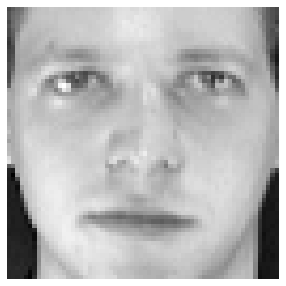

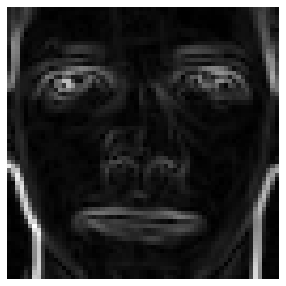

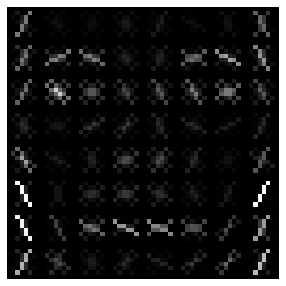

In [ ]:
#features
pixel_features = get_features(lfw_people.images, feat_name='pixels')
sobel_features = get_features(lfw_people.images, feat_name='sobel')
hog_features = get_features(lfw_people.images, feat_name='hog')

# dimensionality reduction

In [ ]:
def get_PCA(X_list, n_components=2):
  pca_list = []
  xpca_list = []
  for X in X_list:
    pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X)
    X_pca = pca.transform(X)
    pca_list.append(pca)
    xpca_list.append(X_pca)
  return pca_list, xpca_list

def plot_PCA(X_list, n_components=2):
  pca_list, xpca_list = get_PCA(X_list, n_components=n_components)

  plt.figure(figsize=(15,5))
  colors = ['b-', 'm-', 'g-']
  labels = ['pixel features', 'sobel features', 'hog features']
  for i in range(len(X_list)):
    plt.plot(np.cumsum(pca_list[i].explained_variance_ratio_), colors[i], label=labels[i])
  plt.xticks(np.arange(n_components)+1)
  plt.yticks(np.linspace(0, 1, 8))
  plt.grid(b=True)
  plt.xlabel('Number of components')
  plt.ylabel('Explained Variances')
  plt.legend()
  plt.show()

def get_tsne(X_list, n_components=2):
  xtsne_list = []
  for X in X_list:
    tsne = TSNE(n_components=n_components, random_state=0)
    X_tsne = tsne.fit_transform(X)
    xtsne_list.append(X_tsne)
  return xtsne_list

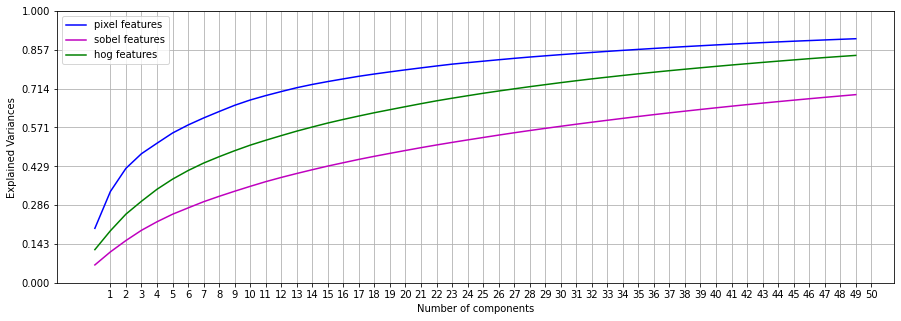

In [ ]:
# plot explained variance vs the number of components for PCA
x = plot_PCA([pixel_features, sobel_features, hog_features], n_components=50)

In [ ]:
# pixel dimensionality reduction (2D)
X_pixels_pca, X_sobel_pca, X_hog_pca = get_PCA([pixel_features, sobel_features, hog_features], n_components=2)[-1]
X_pixels_tsne, X_sobel_tsne, X_hog_tsne = get_tsne([get_PCA([pixel_features], n_components=50)[-1][0], sobel_features, hog_features], n_components=2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

# plot the features

In [ ]:
def plot_classes(X, y, ax, title):

  colormap = plt.cm.tab20 #nipy_spectral #, Set1,Paired
  colorst = [colormap(i) for i in np.linspace(0, 1.0, len(np.unique(y)))]

  for k in range(len(np.unique(y))):
    if X.shape[1] == 2:
      ax.scatter(X[y==k, 0], X[y==k, 1], alpha=0.5, facecolors=colorst[k])
    else:
      ax.scatter(X[y==k, 0], X[y==k, 1], X[y==k, 2], alpha=0.5, facecolors=colorst[k])

  ax.set_title(title)

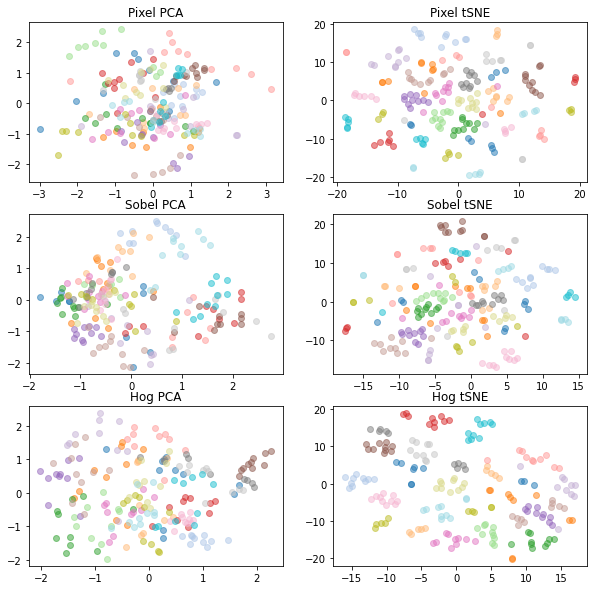

In [ ]:
# project the features into 2 dimensions
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

# y is the class labels
plot_classes(X_pixels_pca, y, ax[0,0], title='Pixel PCA')
plot_classes(X_pixels_tsne, y, ax[0,1], title='Pixel tSNE')
plot_classes(X_sobel_pca, y, ax[1,0], title='Sobel PCA')
plot_classes(X_sobel_tsne, y, ax[1,1], title='Sobel tSNE')
plot_classes(X_hog_pca, y, ax[2,0], title='Hog PCA')
plot_classes(X_hog_tsne, y, ax[2,1], title='Hog tSNE')
plt.show()

In [ ]:
# pixel dimensionality reduction (3D)
X_pixels_pca_3, X_sobel_pca_3, X_hog_pca_3 = get_PCA([pixel_features, sobel_features, hog_features], n_components=3)[-1]
X_pixels_tsne_3, X_sobel_tsne_3, X_hog_tsne_3 = get_tsne([pixel_features, sobel_features, hog_features], n_components=3)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

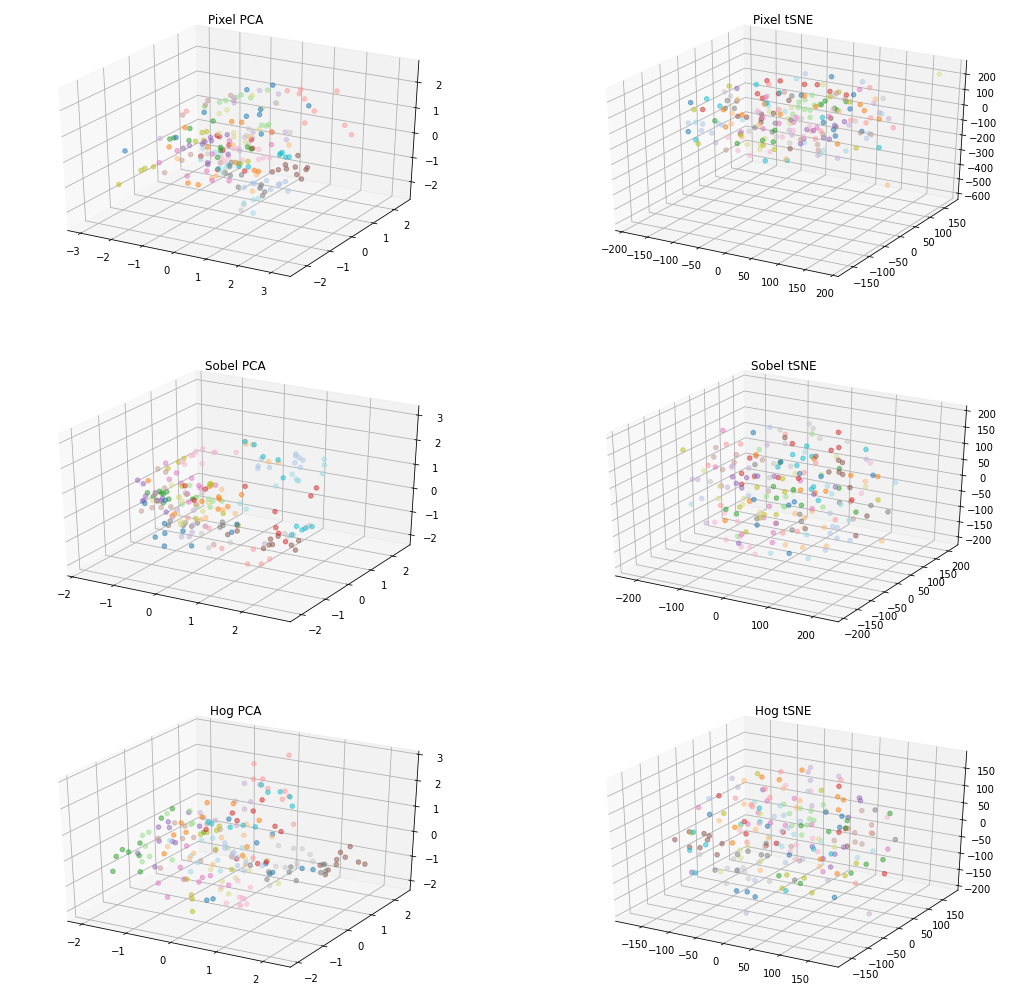

In [ ]:
#TODO: plot in 3D
